In [ ]:
# -------- УПРАЖНЕНИЕ 1 --------

In [2]:
from thinkdsp import SquareSignal

def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    # plot the ratio of the original and smoothed spectrum
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps    
    ratio[amps<560] = 0

    # plot the same ratio along with the FFT of the window
    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Gaussian filter')
    plt.plot(ratio, label='amplitude ratio')

    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')
    plt.show()

In [7]:
def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [10]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import scipy.signal
import numpy as np
from thinkdsp import Wave
import matplotlib.pyplot as plt
from thinkdsp import decorate

slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2);

interactive(children=(IntSlider(value=11, description='M', min=2), FloatSlider(value=2.0, description='std', m…

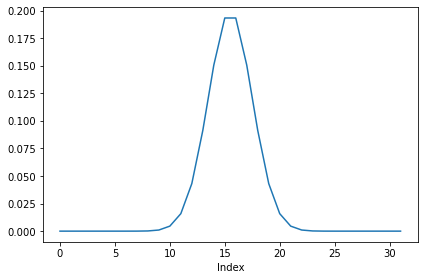

In [11]:
# -------- УПРАЖНЕНИЕ 2 --------

import scipy.signal

gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

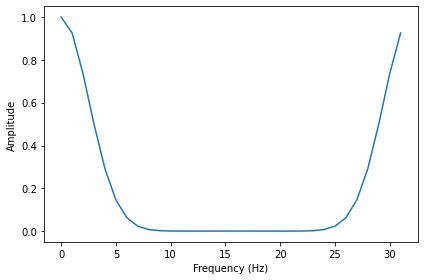

In [12]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

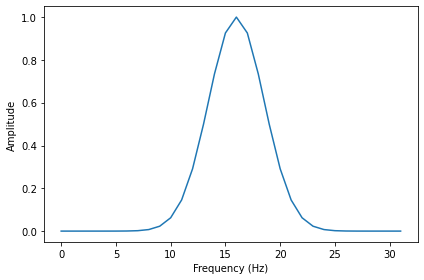

In [13]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

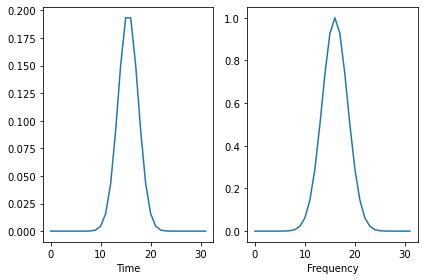

In [15]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

In [16]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

In [17]:
# -------- УПРАЖНЕНИЕ 3 --------
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

In [18]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

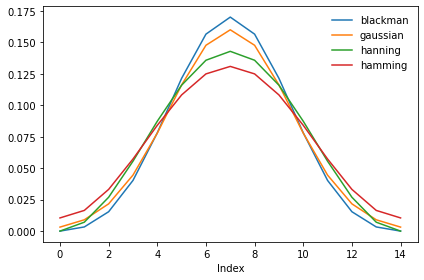

In [19]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

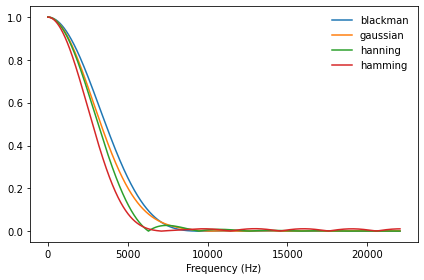

In [20]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)
    
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

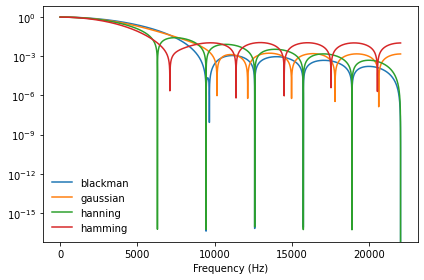

In [21]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')